In [3]:
import os 
import cv2
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline 
import numpy as np
import pandas as pd
import matplotlib.image as mpimg
import matplotlib.pyplot as plt 

In [4]:
# Calibration Points
bottom_left = [283, 574]
top_left = [407,426]
top_right = [703,421]
bottom_right = [737,570]

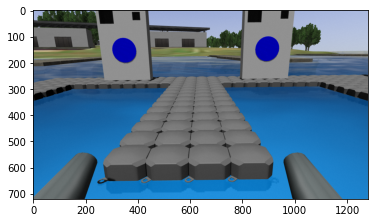

In [5]:
# %matplotlib notebook
image = plt.imread("4.png")
plt.imshow(image)
plt.show()


In [7]:
offset = 5
dst_size =  6
img = np.copy(image)
s = img.shape
print(s)

(720, 1280, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, 'Result')

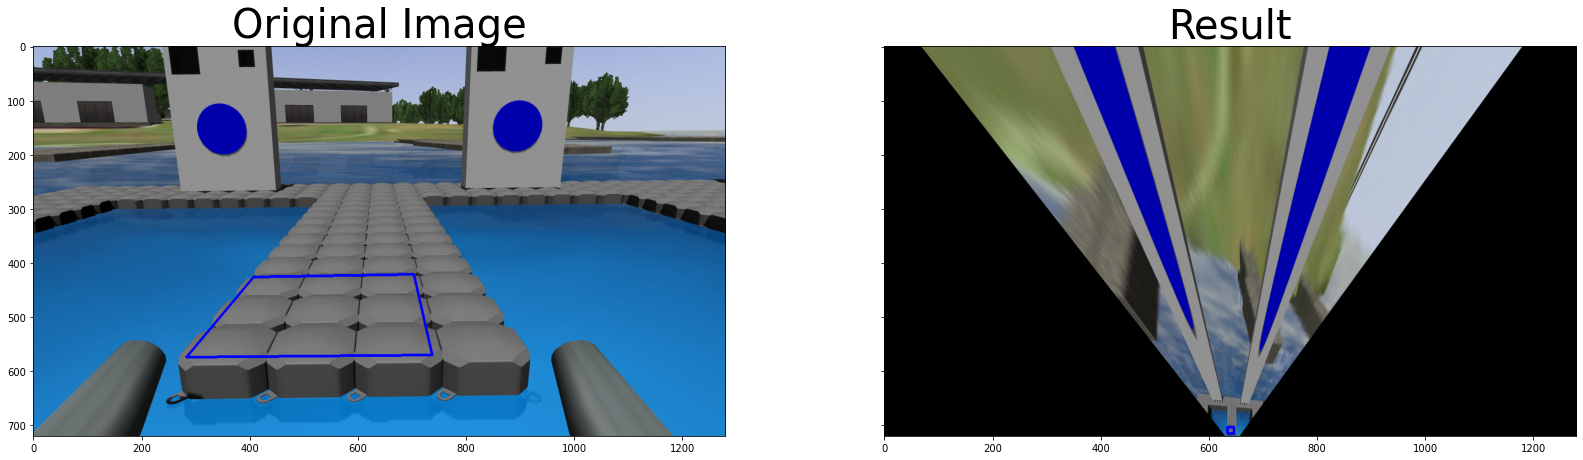

In [9]:
def perspectiveTransform(img, src, dst):
    M = cv2.getPerspectiveTransform(src,dst)
    img_shape = (720, 1280, 3)
    warp = cv2.warpPerspective(img, M, (img_shape[1], img_shape[0]))
    return warp 
### SOUCRE POINTS Reference points from Original Image (for calibration)
# initialzie a list of coordinates that will be ordered
# such that the first entry in the list is the top-left,
# the second entry is the top-right, the third is the
# bottom-right, and the fourth is the bottom-left
ref_points = np.float32([ top_left, top_right,bottom_right, bottom_left])

### Where do i want then to be (Destination points)
dst = np.float32([[s[1]/2-dst_size, s[0] - offset- (2*dst_size)],
                  [s[1]/2+dst_size, s[0] - offset- (2*dst_size)],
                  [s[1]/2+dst_size, s[0] - offset ],
                  [s[1]/2-dst_size, s[0] - offset ]]
                )
warped = perspectiveTransform(img, ref_points,dst)
bin_img = warped
### Highlight the boxes

cv2.polylines(img, np.int32([ref_points]), True, (0,0,255), 3 )
cv2.polylines(warped, np.int32([dst]), True, (0,0,255), 3 )
# cv2.polylines(bin_img, np.int32([dst]), True, (0,0,255), 3 )
f, (ax1,ax2) = plt.subplots(1,2, figsize=(24,6), sharey =True)
f.tight_layout()
ax1.imshow(img)
ax1.set_title('Original Image', fontsize =40)
ax2.imshow(warped, cmap='gray')
ax2.set_title('Result', fontsize =40)
# ax3.imshow(bin_img)
# ax3.set_title('Binary Image', fontsize = 40)
# plt.subplots_adjust(left=0.0, right =1, top=0.9, bottom =0.0)
# plt.show()

In [10]:
#Rover Centric coordinates
def roverCentriCoordinates(binary_image):
    c1, c2, c3 = np.nonzero(binary_image)
    s = binary_image.shape
    y_pix = c2 -  s[1]/2
    x_pix = s[1]/2 - c1
    return x_pix, y_pix
def roverCentriCoordinate(point):
    c1, c2 = point
    s = (720, 1280, 3)
    y_pix = c2 -  s[1]/2
    x_pix = s[1]/2 - c1
    return x_pix, y_pix
def computeRowAngle(rover_centric_coord):
    return np.arctan(rover_centric_coord[1]/rover_centric_coord[0])

In [7]:
obj_pos = list(cv2.perspectiveTransform(np.array([[[600,800],[52,45]]], dtype = "float32"), matrix).ravel())

In [32]:
tmp1 = np.copy(image)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


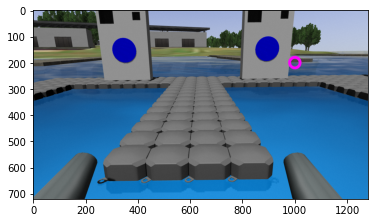

In [33]:
x_center, y_center = (1000, 200)
cv2.circle(tmp1,(x_center, y_center) ,20,(255,0,255),10)
plt.imshow(tmp1)

In [34]:
def reverseRoverCentriCoordinate( point):
    c1, c2 = point
    s = (720, 1280, 3)
    y_pix = c2 +  s[1]/2
    x_pix = s[1]/2 + c1
    return x_pix, y_pix

In [36]:
# Forward
matrix = cv2.getPerspectiveTransform(ref_points, dst)
obj_pos = list(cv2.perspectiveTransform(np.array([[[x_center,y_center]]], dtype = "float32"),matrix).ravel())
wamv_cen_coord = roverCentriCoordinate(obj_pos)
print("Forward transfrom Object Position ", obj_pos)
print("Forward transfrom wamv centric position ", wamv_cen_coord)


# Reverse
imatrix = np.linalg.pinv(matrix)
rev_wamv_cen_coord = reverseRoverCentriCoordinate(wamv_cen_coord)
x_center_rev, y_center_rev = rev_wamv_cen_coord
rev_obj_pos = list(cv2.perspectiveTransform(np.array([[[x_center_rev,y_center_rev]]], dtype = "float32"),imatrix).ravel())
print("Reverse transfrom Object Position ", rev_obj_pos)
print("Reverse transfrom wamv centric position ", rev_wamv_cen_coord)


Forward transfrom Object Position  [705.3181, 588.0266]
Forward transfrom wamv centric position  (-65.318115234375, -51.973388671875)
Reverse transfrom Object Position  [256.22684, 221.12144]
Reverse transfrom wamv centric position  (574.681884765625, 588.026611328125)


In [104]:
rover_centric_coord = roverCentriCoordinate(obj_pos)

In [111]:
computeRowAngle(rover_centric_coord)

-1.5368277666582357